## 0. Importing Packages

### 0.1 Google File Stream

In order to access the google drive files via VScode you need to install the google drive app on your computer. This will create a directory where all of your google drive files are stored on your computer. Any files in this directory will be automatically uploaded/updated in the google drive. To access the files in this path you need to define your own path. 

My path is shown below. Comment out my path and add your own. Whenever you run this notebook make sure that your path is the one that has been run here. 

Then to access any files in the drive within the code you can do something like: `"{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/".format(path)`

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

#path = 'G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Marisol's google file stream path

### 0.2 PYTHONPATH

For Mac:
* Ask Vero how to set up a pythonpath

For windows: 
* Create a directory where you will store your unreleased python packages (specpolFlow and LSDpy). 

* In PowerShell type `setx.exe PYTHONPATH "C:\Users\pjsta\MyPythonPrograms"` Where the thing in the "" is the path of the directory you created. 
    
* Then git clone specpolflow and LSDpy into that directory and close and reopen VScode.

### 0.3 Importing Packages

In [2]:
import LSDpy.lsdpy
import specpolFlow as pol


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools

In [3]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [4]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Halpha shape,Notes,BadvsiniFlag,vsini-estimate,SB-flag,SB9 catalog,pyRavenFlag,Asif Hybrid Over/Underfill,TweakgoodFlag,i_min [deg],Other Notes,JonNotes,Unnamed: 19
0,6226.0,hd6226,1,15000,4.0,T15000g40,120.00,absorption,"no disk during observation, rotational modulat...",1.0,90.0,NaN,NaN,1.0,under,NaN,10.369760,NaN,Definitely classical Be. Line profile weirdnes...,NaN
1,7636.0,hd7636,2,15000,4.0,T15000g40,220.00,asymetric single,binary? no tess observation,NaN,150.0,NaN,NaN,NaN,under,NaN,17.457603,NaN,Definitely classical Be. LPVs probably from pu...,NaN
2,10144.0,hd10144,1,20000,3.5,T20000g35,245.31,bowl,binary or pulsator,NaN,245.0,NaN,NaN,1.0,over,1.0,29.340582,NaN,Achernar! Brightest Be star in the sky. Nice a...,NaN
3,10516.0,hd10516,1,25000,4.0,T25000g40,382.04,asymetric double,sdO companion https://iopscience.iop.org/artic...,1.0,280.0,1.0,SB2,1.0,NaN,1.0,34.055798,NaN,"phi Per, classical Be. The strong asymmetry in...",NaN
4,11415.0,hd11415,1,18000,4.0,T18000g40,48.00,absorption,not a binary https://iopscience.iop.org/articl...,1.0,60.0,NaN,NaN,NaN,under,NaN,6.892103,NaN,"eps Cas. Probably not be a Be star, No sign of...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,217891.0,hd217891,5,15000,3.0,T15000g30,95.00,single,not a binary https://iopscience.iop.org/articl...,1.0,120.0,NaN,NaN,1.0,NaN,1.0,13.886540,NaN,bet Psc. consistently has strong emission. Qui...,NaN
74,221507.0,hd221507,1,10500,4.0,T10500g40,40.00,absorption,Not a Be star,1.0,NaN,NaN,NaN,NaN,under,NaN,4.588566,NaN,"yeah, not a Be star. What's interesting though...",NaN
75,224686.0,hd224686,2,13000,4.0,T13000g40,286.16,shell,NaN,1.0,290.0,NaN,NaN,1.0,under,NaN,35.450543,NaN,typical late-type Be star. Shouldn't have to w...,NaN
76,239712.0,hd239712,1,21000,4.0,T21000g40,304.86,asymetric double,NaN,NaN,290.0,NaN,NaN,1.0,NaN,NaN,35.450543,NaN,distortion in He 6678 probably due to asymmetr...,NaN


In [5]:
Observations

,1,Unnamed: 1,Unnamed: 2,Name,LSDfileName,NameAsif,NameOfMask,Unnamed: 7,NameOfSymbolicLinkToData,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,185,1.0,1,hd6226,hd6226_1.lsd.s,hd6226_1,mask_T15000g40lamb3700_9000.dat,0,hd6226_11AP14_1310132pnv.s,110.34,-60.297909,-70.000000,NaN,NaN,NaN
1,193,2.0,1,hd7636,hd7636_1.lsd.s,hd7636_1,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1314767pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
2,194,2.0,2,hd7636,hd7636_2.lsd.s,hd7636_2,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1316457pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
3,2,3.0,1,hd10144,hd10144_1.lsd.s,hd10144_1,mask_T20000g35lamb3700_9000.dat,1,hd10144_187.D-0917A_2011-12-11_01_pnv.s,245.31,12.981952,12.981952,NaN,NaN,NaN
4,3,4.0,1,hd10516,hd10516_1.lsd.s,hd10516_1,mask_T25000g40lamb3700_9000.dat,0,hd10516_11AP14_1311181pnv.s,382.04,-60.990786,-60.990786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,137,74.0,1,hd221507,hd221507_1.lsd.s,hd221507_1,mask_T10500g40lamb3700_9000.dat,1,hd221507_187.D-0917A_2012-07-19_01_pnv.s,20.00,0.000072,0.000072,NaN,NaN,NaN
197,140,75.0,1,hd224686,hd224686_1.lsd.s,hd224686_1,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-09_01_pnv.s,286.16,11.694301,11.694301,NaN,NaN,NaN
198,141,75.0,2,hd224686,hd224686_2.lsd.s,hd224686_2,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-12_01_pnv.s,286.16,8.724928,8.724928,NaN,NaN,NaN
199,145,76.0,1,hd239712,hd239712_1.lsd.s,hd239712_1,mask_T21000g40lamb3700_9000.dat,0,hd239712_11BP14_1331344pnv.s,304.86,-0.002959,-0.002959,NaN,NaN,NaN


## 1. Demo for single star

The next major step in the Be star project is to run all the stars through pyRaven to calculate the maximum value of Bpole. This take a VERY long time to do, and we don't want to do it for all eight mask models. The plots being made here will allow us to decide which models which don't need to be run through pyRaven. 

We are already excluding the line depth 0.1 models. So the models we want to compare are the following:
* hybrid_maskdepth0.02_tellClean
* hybrid_CleanAsif+tellClean
* hybrid_CleanAsifTweak+tellClean
* normalized_CleanAsif+tellClean
* normalized_CleanAsifTweak+tellClean

An example of the plots we would like for a single star are given below. 

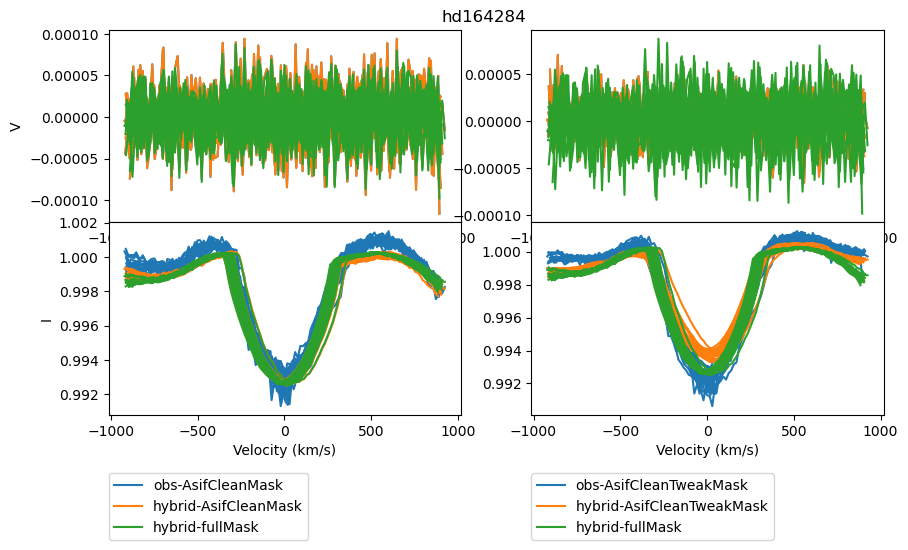

In [7]:
models1=['normalized_CleanAsif+tellClean',
         'hybrid_CleanAsif+tellClean',
         'hybrid_maskdepth0.02_tellClean']

models2=['normalized_CleanAsifTweak+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'hybrid_maskdepth0.02_tellClean']

labels1=['obs-AsifCleanMask','hybrid-AsifCleanMask','hybrid-fullMask']
labels2=['obs-AsifCleanTweakMask','hybrid-AsifCleanTweakMask','hybrid-fullMask']

star=StarData['Name'][49]#12
obs=Observations.loc[Observations["Name"]==star]

fig, ax = plt.subplots(2,2, figsize=(10,5))
for j in range(len(models1)): #Loop over the models
    for i in range(obs['Name'].size): #Loop over the observations

        #Left Plots
        file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models1[j],star,i+1)
        lsd = pol.read_lsd(file)
        lsd_size = lsd.vel.size
        vrad=obs['Unnamed: 11'][obs.index[i]]
        if i ==0:
            ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
        else:
            ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
        ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
        plt.subplots_adjust(hspace=.0)
        ax[1,0].set_xlabel('Velocity (km/s)')
        ax[1,0].set_ylabel('I')
        ax[0,0].set_ylabel('V')

        #Right Plots
        file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
        lsd2 = pol.read_lsd(file2)
        lsd_size2 = lsd2.vel.size
        if i==0:
            ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
        else:
            ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
        ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))

        plt.subplots_adjust(hspace=.0)
        ax[1,1].set_xlabel('Velocity (km/s)')

fig.suptitle(star,y=0.92)
ax[1,0].legend(loc=(0,-0.65))
ax[1,1].legend(loc=(0,-0.65))

## 2. Loop over all Stars (Super Cut)

What we would like is for you make a loop that would make the above plot for each star and save the plots as a pdf.

Ideally what we want to see is no clear differences between the profiles. In that case, as with the left two demo plot, we only need to run one of the three models through pyRaven, saving a lot of time.


In [4]:
%%capture
#Creates multi-page PDF for the plots of specV and specI of each star
models1=['normalized_SuperCleanAsif+tellClean','hybrid_SuperCleanAsif+tellClean','hybrid_maskdepth0.02_tellClean']
models2=['normalized_SuperCleanAsifTweak+tellClean', 'hybrid_SuperCleanAsifTweak+tellClean', 'hybrid_maskdepth0.02_tellClean']
labels1=['obs-AsifSuperCleanMask','hybrid-AsifSuperCleanMask','hybrid-fullMask']
labels2=['obs-AsifSuperCleanTweakMask','hybrid-AsifSuperCleanTweakMask','hybrid-fullMask']

with PdfPages('{}12-LSDComparison_SuperClean.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        
        lsd_mins = []   #Keeps track of the minimum and maximums of the lsd profiles to set the y limits on graphs
        lsd_maxes = []
        specV_mins = []
        specV_maxes =[]
        mask_lines = [] #Keeps track of which lines (the actual values) that were used in the mask
        mask_lines2 = []

        fig, ax = plt.subplots(2,2, figsize=(10, 5))
        for j in range(len(models1)): #Loop over the models
            for i in range(obs['Name'].size): #Loop over the observations
                file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path, models1[j],star, i+1)
                lsd = pol.read_lsd(file)
                lsd_size = int(lsd.vel.size)
                
                star_row = StarData.loc[StarData["Name"] == star]
                mc = star_row["ModelCode"]
                
                if models1[j] == "normalized_SuperCleanAsif+tellClean": 
                    clean_file = '{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path, star, i+1)
                    clean_mask = pol.read_mask(clean_file)  #Reads mask file
                    clean_used = len(clean_mask.wl[clean_mask.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines.append(clean_used)  #Adds the lines that the clean_mask used to the list mask_lines

                if models1[j] == "hybrid_maskdepth0.02_tellClean": #Note: This works for both hybrid models
                    dep02_file = '{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path, mc.item().upper(),star) 
                    dep_02_mask = pol.read_mask(dep02_file)
                    dep_02_used = len(dep_02_mask.wl[dep_02_mask.iuse == 1]) 
                    #Note that we do not need to include a conditional statement since the number of lines per observation will be the same
                
                if models2[j] == "normalized_SuperCleanAsifTweak+tellClean": 
                    clean_file2 = '{}02-Mask-calculations/MaskCleaning/AsifMaskSuperCleanTweak_tellClean/{}_clean_{}.mask_auto_twk'.format(path, star, i+1)
                    clean_mask2 = pol.read_mask(clean_file2)  #Reads mask file
                    clean_used2 = len(clean_mask2.wl[clean_mask2.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines2.append(clean_used2)  #Adds the lines that the clean_mask used to the list mask_lines

                vrad=obs['Unnamed: 11'][obs.index[i]]
                if i == 0 :
                    if j == 0:
                        model_1, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_2, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                    if j == 2:
                        model_3, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                else:
                    ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd.specV))
                specV_maxes.append(max(lsd.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) #wspace for the horizontal space between the subplots; hspace for the vertical space
                ax[1,0].set_xlabel('Velocity (km/s)')
                ax[1,0].set_ylabel('$I  /  I_c$')
                ax[0,0].set_ylabel('$V  /  I_c$')
                
                #Right Plots
                file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
                lsd2 = pol.read_lsd(file2)
                lsd_size2 = int(lsd2.vel.size)

                if i==0:
                    if j == 0:
                        model_12, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_22, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    if j == 2:
                        model_32, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                else:
                    ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd2.specV))
                specV_maxes.append(max(lsd2.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) 
                ax[1,1].set_xlabel('Velocity (km/s)')


        fig.suptitle(star,y=0.93)
        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines) == max(mask_lines):
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,0].legend(labels = [labels1[0]+"  "+ str(clean_used)+ " lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))

        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines2) == max(mask_lines2):
                ax[1,1].legend(handles = [model_12, model_22, model_32], labels = [labels2[0]+"  "+ str(clean_used2)+" lines", labels2[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,1].legend(handles = [model_12, model_22, model_32], labels = [labels2[0]+"  "+ str(clean_used2) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,1].legend(labels = [labels2[0]+"  "+ str(clean_used2)+ " lines", labels2[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))
        
        #ax[1,1].legend(loc=(0,-0.65))

        ax[1,0].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002]) #Makes the y-axis limits the same for the left and right plots
        ax[1,1].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002])
        ax[0,0].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])
        ax[0,1].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])

        ax[0,0].set_xticks([]) #Removes x ticks from the top two subplots since the x-axis is the same for all of the subplots
        ax[0,1].set_xticks([])

        pdf.savefig(fig, bbox_inches='tight') #Includes legend in PDF

## 3. Loop over all Stars

What we would like is for you make a loop that would make the above plot for each star and save the plots as a pdf.

Ideally what we want to see is no clear differences between the profiles. In that case, as with the left two demo plot, we only need to run one of the three models through pyRaven, saving a lot of time.


In [10]:
%%capture
#Creates multi-page PDF for the plots of specV and specI of each star
models1=['normalized_CleanAsif+tellClean','hybrid_CleanAsif+tellClean','hybrid_maskdepth0.02_tellClean']
models2=['normalized_CleanAsifTweak+tellClean', 'hybrid_CleanAsifTweak+tellClean', 'hybrid_maskdepth0.02_tellClean']
labels1=['obs-AsifCleanMask','hybrid-AsifCleanMask','hybrid-fullMask']
labels2=['obs-AsifCleanTweakMask','hybrid-AsifCleanTweakMask','hybrid-fullMask']

with PdfPages('{}12-LSDComparison/12-LSDComparison.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        
        lsd_mins = []   #Keeps track of the minimum and maximums of the lsd profiles to set the y limits on graphs
        lsd_maxes = []
        specV_mins = []
        specV_maxes =[]
        mask_lines = [] #Keeps track of which lines (the actual values) that were used in the mask
        mask_lines2 = []

        fig, ax = plt.subplots(2,2, figsize=(10, 5))
        for j in range(len(models1)): #Loop over the models
            for i in range(obs['Name'].size): #Loop over the observations
                file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path, models1[j],star, i+1)
                lsd = pol.read_lsd(file)
                lsd_size = int(lsd.vel.size)
                
                star_row = StarData.loc[StarData["Name"] == star]
                mc = star_row["ModelCode"]
                
                if models1[j] == "normalized_CleanAsif+tellClean": 
                    clean_file = '{}02-Mask-calculations/MaskCleaning/AsifMaskClean_tellClean/{}_clean_{}.mask'.format(path, star, i+1)
                    clean_mask = pol.read_mask(clean_file)  #Reads mask file
                    clean_used = len(clean_mask.wl[clean_mask.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines.append(clean_used)  #Adds the lines that the clean_mask used to the list mask_lines

                if models1[j] == "hybrid_maskdepth0.02_tellClean": #Note: This works for both hybrid models
                    dep02_file = '{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path, mc.item().upper(),star) 
                    dep_02_mask = pol.read_mask(dep02_file)
                    dep_02_used = len(dep_02_mask.wl[dep_02_mask.iuse == 1]) 
                    #Note that we do not need to include a conditional statement since the number of lines per observation will be the same
                
                if models2[j] == "normalized_CleanAsifTweak+tellClean": 
                    clean_file2 = '{}02-Mask-calculations/MaskCleaning/AsifMaskCleanTweak_tellClean/{}_clean_{}.mask_auto_twk'.format(path, star, i+1)
                    clean_mask2 = pol.read_mask(clean_file2)  #Reads mask file
                    clean_used2 = len(clean_mask2.wl[clean_mask2.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines2.append(clean_used2)  #Adds the lines that the clean_mask used to the list mask_lines

                vrad=obs['Unnamed: 11'][obs.index[i]]
                if i == 0 :
                    if j == 0:
                        model_1, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_2, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                    if j == 2:
                        model_3, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                else:
                    ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd.specV))
                specV_maxes.append(max(lsd.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) #wspace for the horizontal space between the subplots; hspace for the vertical space
                ax[1,0].set_xlabel('Velocity (km/s)')
                ax[1,0].set_ylabel('$I  /  I_c$')
                ax[0,0].set_ylabel('$V  /  I_c$')
                
                #Right Plots
                file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
                lsd2 = pol.read_lsd(file2)
                lsd_size2 = int(lsd2.vel.size)

                if i==0:
                    if j == 0:
                        model_12, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_22, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    if j == 2:
                        model_32, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                else:
                    ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd2.specV))
                specV_maxes.append(max(lsd2.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) 
                ax[1,1].set_xlabel('Velocity (km/s)')


        fig.suptitle(star,y=0.93)
        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines) == max(mask_lines):
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,0].legend(handles = [model_1, model_2, model_3], labels = [labels1[0]+"  "+ str(clean_used) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,0].legend(labels = [labels1[0]+"  "+ str(clean_used)+ " lines", labels1[1]+"  " + str(clean_used)+" lines", labels1[2]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))

        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines2) == max(mask_lines2):
                ax[1,1].legend(handles = [model_12, model_22, model_32], labels = [labels2[0]+"  "+ str(clean_used2)+" lines", labels2[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,1].legend(handles = [model_12, model_22, model_32], labels = [labels2[0]+"  "+ str(clean_used2) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,1].legend(labels = [labels2[0]+"  "+ str(clean_used2)+ " lines", labels2[1]+"  " + str(clean_used2)+" lines", labels2[2]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))
        
        #ax[1,1].legend(loc=(0,-0.65))

        ax[1,0].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002]) #Makes the y-axis limits the same for the left and right plots
        ax[1,1].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002])
        ax[0,0].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])
        ax[0,1].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])

        ax[0,0].set_xticks([]) #Removes x ticks from the top two subplots since the x-axis is the same for all of the subplots
        ax[0,1].set_xticks([])

        pdf.savefig(fig, bbox_inches='tight') #Includes legend in PDF

In [6]:
%%capture
#Creates multi-page PDF for the plots of specV and specI of each star
models1=['normalized_SuperCleanAsif+tellClean','hybrid_SuperCleanAsif+tellClean','normalized_CleanAsif+tellClean','hybrid_CleanAsif+tellClean','hybrid_maskdepth0.02_tellClean']
models2=['normalized_SuperCleanAsifTweak+tellClean', 'hybrid_SuperCleanAsifTweak+tellClean','normalized_CleanAsifTweak+tellClean', 'hybrid_CleanAsifTweak+tellClean', 'hybrid_maskdepth0.02_tellClean']
labels1=['obs-AsifSuperCleanMask','hybrid-AsifSuperCleanMask','obs-AsifCleanMask','hybrid-AsifCleanMask','hybrid-fullMask']
labels2=['obs-AsifSuperCleanTweakMask','hybrid-AsifSuperCleanTweakMask','obs-AsifCleanTweakMask','hybrid-AsifCleanTweakMask','hybrid-fullMask']

with PdfPages('{}12-LSDComparison/12-LSDComparison_All.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        
        lsd_mins = []   #Keeps track of the minimum and maximums of the lsd profiles to set the y limits on graphs
        lsd_maxes = []
        specV_mins = []
        specV_maxes =[]
        mask_lines = [] #Keeps track of which lines (the actual values) that were used in the mask
        mask_lines2 = []

        fig, ax = plt.subplots(2,2, figsize=(10, 5))
        for j in range(len(models1)): #Loop over the models
            for i in range(obs['Name'].size): #Loop over the observations
                file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path, models1[j],star, i+1)
                lsd = pol.read_lsd(file)
                lsd_size = int(lsd.vel.size)
                
                star_row = StarData.loc[StarData["Name"] == star]
                mc = star_row["ModelCode"]
                
                if models1[j] == "normalized_SuperCleanAsif+tellClean": 
                    clean_file = '{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path, star, i+1)
                    clean_mask = pol.read_mask(clean_file)  #Reads mask file
                    clean_used = len(clean_mask.wl[clean_mask.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines.append(clean_used)  #Adds the lines that the clean_mask used to the list mask_lines

                if models1[j] == "hybrid_maskdepth0.02_tellClean": #Note: This works for both hybrid models
                    dep02_file = '{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path, mc.item().upper(),star) 
                    dep_02_mask = pol.read_mask(dep02_file)
                    dep_02_used = len(dep_02_mask.wl[dep_02_mask.iuse == 1]) 
                    #Note that we do not need to include a conditional statement since the number of lines per observation will be the same
                
                if models2[j] == "normalized_SuperCleanAsifTweak+tellClean": 
                    clean_file2 = '{}02-Mask-calculations/MaskCleaning/AsifMaskSuperCleanTweak_tellClean/{}_clean_{}.mask_auto_twk'.format(path, star, i+1)
                    clean_mask2 = pol.read_mask(clean_file2)  #Reads mask file
                    clean_used2 = len(clean_mask2.wl[clean_mask2.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines2.append(clean_used2)  #Adds the lines that the clean_mask used to the list mask_lines

                if models1[j] == "normalized_CleanAsif+tellClean": 
                    clean_file3 = '{}02-Mask-calculations/MaskCleaning/AsifMaskClean_tellClean/{}_clean_{}.mask'.format(path, star, i+1)
                    clean_mask3 = pol.read_mask(clean_file3)  #Reads mask file
                    clean_used3 = len(clean_mask3.wl[clean_mask3.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines.append(clean_used3)  #Adds the lines that the clean_mask used to the list mask_lines
                
                if models2[j] == "normalized_CleanAsifTweak+tellClean": 
                    clean_file4 = '{}02-Mask-calculations/MaskCleaning/AsifMaskCleanTweak_tellClean/{}_clean_{}.mask_auto_twk'.format(path, star, i+1)
                    clean_mask4 = pol.read_mask(clean_file4)  #Reads mask file
                    clean_used4 = len(clean_mask4.wl[clean_mask4.iuse == 1]) #The total number of lines used in the observation
                    if StarData["Nobs"][i] >=  1:
                        mask_lines2.append(clean_used4)  #Adds the lines that the clean_mask used to the list mask_lines

                vrad=obs['Unnamed: 11'][obs.index[i]]
                if i == 0 :
                    if j == 0:
                        model_1, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_2, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                    if j == 2:
                        model_3, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 3:
                        model_4, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                    if j == 4:
                        model_5, = ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,label=labels1[j],color='C{}'.format(j))
                else:
                    ax[1,0].plot(lsd.vel+vrad, lsd.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,0].plot(lsd.vel+vrad, lsd.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd.specV))
                specV_maxes.append(max(lsd.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) #wspace for the horizontal space between the subplots; hspace for the vertical space
                ax[1,0].set_xlabel('Velocity (km/s)')
                ax[1,0].set_ylabel('$I  /  I_c$')
                ax[0,0].set_ylabel('$V  /  I_c$')
                
                #Right Plots
                file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
                lsd2 = pol.read_lsd(file2)
                lsd_size2 = int(lsd2.vel.size)

                if i==0:
                    if j == 0:
                        model_12, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j)) # Although this seems unnecessary, it is for the legend
                    if j == 1:
                        model_22, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    if j == 2:
                        model_32, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    if j == 3:
                        model_42, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                    if j == 4:
                        model_52, = ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,label=labels2[j],color='C{}'.format(j))
                else:
                    ax[1,1].plot(lsd2.vel+vrad, lsd2.specI, ms=3,color='C{}'.format(j))
                lsd_mins.append(min(lsd.specI))
                lsd_maxes.append(max(lsd.specI))

                ax[0,1].plot(lsd2.vel+vrad, lsd2.specV, ms=3,color='C{}'.format(j))
                specV_mins.append(min(lsd2.specV))
                specV_maxes.append(max(lsd2.specV))

                plt.subplots_adjust(wspace = 0.25, hspace= .0) 
                ax[1,1].set_xlabel('Velocity (km/s)')


        fig.suptitle(star,y=0.93)
        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines) == max(mask_lines):
                ax[1,0].legend(handles = [model_1, model_2, model_3, model_4,model_5], labels = [labels1[0]+"  "+ str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines",labels1[2]+"  "+ str(clean_used3)+" lines", labels1[3]+"  " + str(clean_used3)+" lines", labels1[4]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,0].legend(handles = [model_1, model_2, model_3, model_4,model_5], labels = [labels1[0]+"  "+ str(clean_used) + "-" + str(clean_used)+" lines", labels1[1]+"  " + str(clean_used)+" lines",labels1[2]+"  "+ str(clean_used3) + "-" + str(clean_used3)+" lines", labels1[3]+"  " + str(clean_used3)+" lines", labels1[4]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,0].legend(labels = [labels1[0]+"  "+ str(clean_used)+ " lines", labels1[1]+"  " + str(clean_used)+" lines",labels1[2]+"  "+ str(clean_used3)+ " lines", labels1[3]+"  " + str(clean_used3)+" lines", labels1[4]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))
        if StarData["Nobs"][i] > 1: #Labeling the legend for the right subplots
            if min(mask_lines) == max(mask_lines):
                ax[1,1].legend(handles = [model_12, model_22, model_32, model_42,model_52], labels = [labels2[0]+"  "+ str(clean_used2)+" lines", labels2[1]+"  " + str(clean_used2)+" lines",labels2[2]+"  "+ str(clean_used4)+" lines", labels2[3]+"  " + str(clean_used4)+" lines", labels2[4]+"  "+ str(dep_02_used) +" lines"], loc=(0,-0.65))
            else:
                ax[1,1].legend(handles = [model_12, model_22, model_32, model_42,model_52], labels = [labels2[0]+"  "+ str(clean_used2) + "-" + str(clean_used2)+" lines", labels2[1]+"  " + str(clean_used2)+" lines",labels2[2]+"  "+ str(clean_used4) + "-" + str(clean_used4)+" lines", labels2[3]+"  " + str(clean_used4)+" lines", labels1[4]+"  "+ str(dep_02_used) +" lines"],loc=(0,-0.65))
        else:
            ax[1,1].legend(labels = [labels2[0]+"  "+ str(clean_used2)+ " lines", labels2[1]+"  " + str(clean_used2)+" lines",labels2[2]+"  "+ str(clean_used4)+ " lines", labels2[3]+"  " + str(clean_used4)+" lines", labels2[4]+"  "+ str(dep_02_used)+" lines"], loc=(0,-0.65))


        ax[1,0].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002]) #Makes the y-axis limits the same for the left and right plots
        ax[1,1].set_ylim([min(lsd_mins) - 0.002 , max(lsd_maxes) + 0.002])
        ax[0,0].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])
        ax[0,1].set_ylim([min(specV_mins) - 7E-6 , max(specV_maxes) + 7E-6])

        ax[0,0].set_xticks([]) #Removes x ticks from the top two subplots since the x-axis is the same for all of the subplots
        ax[0,1].set_xticks([])

        pdf.savefig(fig, bbox_inches='tight') #Includes legend in PDF

## 4. Metals vs He

In [7]:
%%capture
#Creates multi-page PDF for the plots of specV and specI of each star
from LSDpy import lsdpy
with PdfPages('{}12-LSDComparison/HevMetals.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        if np.isnan(StarData['vsini-estimate'][i])==True:
            vsini = StarData['Adopted-vsini'][i]
        if np.isnan(StarData['vsini-estimate'][i])==False:
            vsini=StarData['vsini-estimate'][i]
        
        ModelCode=StarData['ModelCode'][i].upper()

        fig, ax = plt.subplots(2,3,sharex=True,figsize=(18,12))
        for j in range(len(obs)):
                #get Full Mask with all lines
                AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
                AFmask = pol.read_mask(fname=AFfile_mask)

                #get SuperClean Mask with all Lines
                AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
                AUmask = pol.read_mask(fname=AUfile_mask)

                #create and get Full Mask with He lines only
                AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
                AFmask = pol.read_mask(fname=AFfile_mask)
                AFmask.iuse[np.where(AFmask.element>=3.)]=0
                AFmask.save('{}12-LSDComparison/HevsMetals/{}/{}_Full_HeOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini))
                HeFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_HeOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
                HeFmask = pol.read_mask(fname=HeFfile_mask)

                #create and get SuperClean Mask with He Lines only
                AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
                AUmask = pol.read_mask(fname=AUfile_mask)
                AUmask.iuse[np.where(AUmask.element>=3.)]=0
                AUmask.save('{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_HeOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1))
                HeUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_HeOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
                HeUmask = pol.read_mask(fname=HeUfile_mask)

                #create and get Full Mask with Metal lines only
                AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
                AFmask = pol.read_mask(fname=AFfile_mask) 
                Hewl=AFmask.wl[np.where(AFmask.iuse==1.)[0]][np.where(AFmask.element[np.where(AFmask.iuse==1.)[0]]==2.)[0]]
                for k in range(Hewl.size):
                        lower=((-3*vsini*u.km/u.s)/const.c*Hewl[k]*u.nm+Hewl[k]*u.nm).to(u.nm)/u.nm
                        upper=((3*vsini*u.km/u.s)/const.c*Hewl[k]*u.nm+Hewl[k]*u.nm).to(u.nm)/u.nm
                        AFmask.iuse[np.where((AFmask.wl>=lower) & (AFmask.wl<=upper))[0]]=0
                AFmask.save('{}12-LSDComparison/HevsMetals/{}/{}_Full_MetalsOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini))
                MFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_MetalsOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
                MFmask = pol.read_mask(fname=MFfile_mask)

                #create and get SuperClean Mask with Metal lines onley
                AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
                AUmask = pol.read_mask(fname=AUfile_mask)
                Hewl=AUmask.wl[np.where(AUmask.iuse==1.)[0]][np.where(AUmask.element[np.where(AUmask.iuse==1.)[0]]==2.)[0]]
                for k in range(Hewl.size):
                        lower=((-3*vsini*u.km/u.s)/const.c*Hewl[k]*u.nm+Hewl[k]*u.nm).to(u.nm)/u.nm
                        upper=((3*vsini*u.km/u.s)/const.c*Hewl[k]*u.nm+Hewl[k]*u.nm).to(u.nm)/u.nm
                        AUmask.iuse[np.where((AUmask.wl>=lower) & (AUmask.wl<=upper))[0]]=0
                AUmask.save('{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_MetalsOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1))
                MUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_MetalsOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
                MUmask = pol.read_mask(fname=MUfile_mask)

                #get Full Mask with all lines
                AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
                AFmask = pol.read_mask(fname=AFfile_mask)

                #get SuperClean Mask with all Lines
                AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
                AUmask = pol.read_mask(fname=AUfile_mask)


                #Get Original Spectra file
                file = '{}00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(path,star,j+1)
                data = pol.read_spectrum(file)

                #get synthetic spectra file
                synthfile = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_{}_noise.s'.format(path,star,j+1)
                synth = pol.read_spectrum(synthfile)

                #LSD parameters
                velS=-3*vsini
                velE=3*vsini
                velP=3.0

                #All Lines
                outfile_AFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=AFfile_mask, outName=outfile_AFH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                AFH = pol.read_lsd(outfile_AFH)

                outfile_AUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=AUfile_mask, outName=outfile_AUH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                AUH = pol.read_lsd(outfile_AUH)

                outfile_AUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=AUfile_mask, outName=outfile_AUO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                AUO=pol.read_lsd(outfile_AUO)

                outfile_AFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=AFfile_mask, outName=outfile_AFO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                AFO=pol.read_lsd(outfile_AFO)

                #He lines only
                outfile_HeFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=HeFfile_mask, outName=outfile_HeFH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                HeFH = pol.read_lsd(outfile_HeFH)

                outfile_HeUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=HeUfile_mask, outName=outfile_HeUH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                HeUH = pol.read_lsd(outfile_HeUH)

                outfile_HeUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=HeUfile_mask, outName=outfile_HeUO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                HeUO=pol.read_lsd(outfile_HeUO)

                outfile_HeFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=HeFfile_mask, outName=outfile_HeFO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                HeFO=pol.read_lsd(outfile_HeFO)

                #Metal lines only
                outfile_MFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_MetalsOnly.lsd_{}'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=MFfile_mask, outName=outfile_MFH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                MFH = pol.read_lsd(outfile_MFH)

                outfile_MUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=synthfile, mask=MUfile_mask, outName=outfile_MUH, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                MUH = pol.read_lsd(outfile_MUH)

                outfile_MUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=MUfile_mask, outName=outfile_MUO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                MUO=pol.read_lsd(outfile_MUO)

                outfile_MFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                toto = lsdpy.main(observation=file, mask=MFfile_mask, outName=outfile_MFO, 
                        velStart=velS, velEnd=velE, velPixel=velP, 
                        normDepth=0.2, normLande=1.2, normWave=500.0,
                        removeContPol=1, trimMask=0, sigmaClipIter=0, sigmaClip=500, 
                        interpMode=1, fSaveModelS=0, outModelName='',
                        fLSDPlotImg=0, fSavePlotImg=0, outPlotImgName='')
                MFO=pol.read_lsd(outfile_MFO)



                ax[0,0].set_title('All Lines; {}, {}, {} km/s'.format(star,ModelCode,vsini))
                ax[0,0].plot(AFH.vel,AFH.specV,color='C0')
                ax[0,0].plot(AUO.vel,AUO.specV,color='C1')
                ax[0,0].plot(AUH.vel,AUH.specV,color='C2')
                ax[0,0].plot(AFO.vel,AFO.specV,color='C3')
                ax[1,0].plot(AFH.vel,AFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                ax[1,0].plot(AUO.vel,AUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                ax[1,0].plot(AUH.vel,AUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                ax[1,0].plot(AFO.vel,AFO.specI,color='C3',label='Full Observed'.format(ModelCode))

                ax[0,0].set_ylabel('Stoke V')
                ax[1,0].set_ylabel('Stoke I')
                ax[1,0].set_xlabel('Velocity [km/s]')

                ax[0,1].set_title('He Lines Only')
                ax[0,1].plot(HeFH.vel,HeFH.specV,color='C0')
                ax[0,1].plot(HeUO.vel,HeUO.specV,color='C1')
                ax[0,1].plot(HeUH.vel,HeUH.specV,color='C2')
                ax[0,1].plot(HeFO.vel,HeFO.specV,color='C3')
                ax[1,1].plot(HeFH.vel,HeFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                ax[1,1].plot(HeUO.vel,HeUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                ax[1,1].plot(HeUH.vel,HeUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                ax[1,1].plot(HeFO.vel,HeFO.specI,color='C3',label='Full Observed'.format(ModelCode))

                ax[0,2].set_title('Metal Lines Only')
                ax[0,2].plot(MFH.vel,MFH.specV,color='C0')
                ax[0,2].plot(MUO.vel,MUO.specV,color='C1')
                ax[0,2].plot(MUH.vel,MUH.specV,color='C2')
                ax[0,2].plot(MFO.vel,MFO.specV,color='C3')
                ax[1,2].plot(MFH.vel,MFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                ax[1,2].plot(MUO.vel,MUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                ax[1,2].plot(MUH.vel,MUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                ax[1,2].plot(MFO.vel,MFO.specI,color='C3',label='Full Observed'.format(ModelCode))

                ax[1,2].set_xlabel('Velocity [km/s]')

                if j==0:
                        ax[1,0].legend()
                

                plt.subplots_adjust(wspace=0.2, hspace=0)
        pdf.savefig(fig)

OSError: [Errno 22] Invalid argument

In [10]:
%%capture
with PdfPages('{}11-MaskComparison/HevMetals_masks.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        if np.isnan(StarData['vsini-estimate'][i])==True:
            vsini = StarData['Adopted-vsini'][i]
        if np.isnan(StarData['vsini-estimate'][i])==False:
            vsini=StarData['vsini-estimate'][i]
        
        ModelCode=StarData['ModelCode'][i].upper()

        fig, ax = plt.subplots(1,3,sharex=False,figsize=(18,6))
        j=0
        #get Full Mask with all lines
        AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(path,ModelCode)
        AFmask = pol.read_mask(fname=AFfile_mask)

        #get SuperClean Mask with all Lines
        AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
        AUmask = pol.read_mask(fname=AUfile_mask)

        #create and get Full Mask with He lines only
        HeFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_HeOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
        HeFmask = pol.read_mask(fname=HeFfile_mask)

        #create and get SuperClean Mask with He Lines only
        HeUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_HeOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
        HeUmask = pol.read_mask(fname=HeUfile_mask)

        #create and get Full Mask with Metal lines only
        MFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_MetalsOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
        MFmask = pol.read_mask(fname=MFfile_mask)

        #create and get SuperClean Mask with Metal lines onley
        MUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_MetalsOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
        MUmask = pol.read_mask(fname=MUfile_mask)


        #Get Original Spectra file
        file = '{}00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(path,star,j+1)
        data = pol.read_spectrum(file)

        #get synthetic spectra file
        synthfile = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_{}_noise.s'.format(path,star,j+1)
        synth = pol.read_spectrum(synthfile)


        bins=np.arange(AFmask[np.where(AFmask.iuse==1)].depth.min(),AFmask[np.where(AFmask.iuse==1)].depth.max(),np.abs(AFmask[np.where(AFmask.iuse==1)].depth.min()-AFmask[np.where(AFmask.iuse==1)].depth.max())/10)
        ax[0].hist(AFmask[np.where(AFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(AFmask[np.where(AFmask.iuse==1)].depth.size),histtype='step',color='black',linewidth=3)
        ax[0].hist(AUmask[np.where(AUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(AUmask[np.where(AUmask.iuse==1)].depth.size))
        ax[0].legend()
        ax[0].set_title('{} All Lines'.format(star))
        ax[0].set_xlabel('Line Depth')

        ax[1].hist(HeFmask[np.where(HeFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(HeFmask[np.where(HeFmask.iuse==1)].depth.size),histtype='step',color='black',linewidth=3)
        ax[1].hist(HeUmask[np.where(HeUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(HeUmask[np.where(HeUmask.iuse==1)].depth.size))
        ax[1].legend()
        ax[1].set_title('{} He Lines Only'.format(star))
        ax[1].set_xlabel('Line Depth')

        ax[2].hist(MFmask[np.where(MFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(MFmask[np.where(MFmask.iuse==1)].depth.size),histtype='step',color='black',linewidth=3)
        ax[2].hist(MUmask[np.where(MUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(MUmask[np.where(MUmask.iuse==1)].depth.size))
        ax[2].legend()
        ax[2].set_title('{} Metal Lines Only'.format(star))
        ax[2].set_xlabel('Line Depth')

        plt.subplots_adjust(wspace=0.2, hspace=0.1)
        pdf.savefig(fig)


FileNotFoundError: G:/Shared drives/BeStarsMiMeS/UpdatedFiles/02-Mask-calculations/MaskCleaning/depth0.02_tellClean/T15000G40_depth0.02.mask not found.

In [13]:
%%capture
#Creates multi-page PDF for the plots of specV and specI of each star
from LSDpy import lsdpy
with PdfPages('{}12-LSDComparison/HevMetals+masks.pdf'.format(path)) as pdf:
    for i in range(len(StarData)): #Loops over all the stars in StarData
        star = StarData["Name"][i]
        obs=Observations.loc[Observations["Name"] == star]
        if np.isnan(StarData['vsini-estimate'][i])==True:
            vsini = StarData['Adopted-vsini'][i]
        if np.isnan(StarData['vsini-estimate'][i])==False:
            vsini=StarData['vsini-estimate'][i]
        
        ModelCode=StarData['ModelCode'][i].upper()

        gs_LSD=plt.GridSpec(3,3,top=0.9,hspace=0)
        gs_hist=plt.GridSpec(3,3)
        fig = plt.figure(figsize=(18,18))

        #LSD
        ax = fig.add_subplot(gs_LSD[0,0])
        axes=[ax]
        for y1 in range(1,3):
            axes.append(fig.add_subplot(gs_LSD[0,y1]))
        for y2 in range(0,3):
            axes.append(fig.add_subplot(gs_LSD[1,y2],sharex=axes[y2]))

        #hist
        for y3 in range(0,3):
            axes.append(fig.add_subplot(gs_hist[2,y3]))


        for j in range(len(obs)):
                #get Full Mask with all lines
                AFfile_mask='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
                AFmask = pol.read_mask(fname=AFfile_mask)

                #get SuperClean Mask with all Lines
                AUfile_mask='{}02-Mask-calculations/MaskCleaning/AsifMaskSuperClean_tellClean/{}_clean_{}.mask'.format(path,star,j+1)
                AUmask = pol.read_mask(fname=AUfile_mask)

                #create and get Full Mask with He lines only
                HeFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_HeOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
                HeFmask = pol.read_mask(fname=HeFfile_mask)

                #create and get SuperClean Mask with He Lines only 
                HeUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_HeOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
                HeUmask = pol.read_mask(fname=HeUfile_mask)

                #create and get Full Mask with Metal lines only
                MFfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_Full_MetalsOnly_{}_{}.mask'.format(path,star,star,ModelCode,vsini)
                MFmask = pol.read_mask(fname=MFfile_mask)

                #create and get SuperClean Mask with Metal lines onley
                MUfile_mask='{}12-LSDComparison/HevsMetals/{}/{}_SuperClean_MetalsOnly_{}_{}_{}.mask'.format(path,star,star,ModelCode,vsini,j+1)
                MUmask = pol.read_mask(fname=MUfile_mask)

                #Get Original Spectra file
                file = '{}00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(path,star,j+1)
                data = pol.read_spectrum(file)

                #get synthetic spectra file
                synthfile = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_{}_noise.s'.format(path,star,j+1)
                synth = pol.read_spectrum(synthfile)

                #LSD parameters
                velS=-3*vsini
                velE=3*vsini
                velP=3.0

                #All Lines
                outfile_AFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                AFH = pol.read_lsd(outfile_AFH)

                outfile_AUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                AUH = pol.read_lsd(outfile_AUH)

                outfile_AUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                AUO=pol.read_lsd(outfile_AUO)

                outfile_AFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                AFO=pol.read_lsd(outfile_AFO)

                #He lines only
                outfile_HeFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                HeFH = pol.read_lsd(outfile_HeFH)

                outfile_HeUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                HeUH = pol.read_lsd(outfile_HeUH)

                outfile_HeUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                HeUO=pol.read_lsd(outfile_HeUO)

                outfile_HeFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_HeOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                HeFO=pol.read_lsd(outfile_HeFO)

                #Metal lines only
                outfile_MFH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FH_MetalsOnly.lsd_{}'.format(path,star,star,ModelCode,vsini,j+1)
                MFH = pol.read_lsd(outfile_MFH)

                outfile_MUH='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UH_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                MUH = pol.read_lsd(outfile_MUH)

                outfile_MUO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_UO_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                MUO=pol.read_lsd(outfile_MUO)

                outfile_MFO='{}12-LSDComparison/HevsMetals/{}/{}_{}_{}_FO_MetalsOnly_{}.lsd'.format(path,star,star,ModelCode,vsini,j+1)
                MFO=pol.read_lsd(outfile_MFO)



                axes[0].set_title('All Lines; {}, {}, {} km/s'.format(star,ModelCode,vsini))
                axes[0].plot(AFH.vel,AFH.specV,color='C0')
                axes[0].plot(AUO.vel,AUO.specV,color='C1')
                axes[0].plot(AUH.vel,AUH.specV,color='C2')
                axes[0].plot(AFO.vel,AFO.specV,color='C3')
                axes[3].plot(AFH.vel,AFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                axes[3].plot(AUO.vel,AUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                axes[3].plot(AUH.vel,AUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                axes[3].plot(AFO.vel,AFO.specI,color='C3',label='Full Observed'.format(ModelCode))

                axes[0].set_ylabel('Stoke V')
                axes[3].set_ylabel('Stoke I')
                axes[3].set_xlabel('Velocity [km/s]')

                axes[1].set_title('He Lines Only')
                axes[1].plot(HeFH.vel,HeFH.specV,color='C0')
                axes[1].plot(HeUO.vel,HeUO.specV,color='C1')
                axes[1].plot(HeUH.vel,HeUH.specV,color='C2')
                axes[1].plot(HeFO.vel,HeFO.specV,color='C3')
                axes[4].plot(HeFH.vel,HeFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                axes[4].plot(HeUO.vel,HeUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                axes[4].plot(HeUH.vel,HeUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                axes[4].plot(HeFO.vel,HeFO.specI,color='C3',label='Full Observed'.format(ModelCode))
                axes[4].set_xlabel('Velocity [km/s]')

                axes[2].set_title('Metal Lines Only')
                axes[2].plot(MFH.vel,MFH.specV,color='C0')
                axes[2].plot(MUO.vel,MUO.specV,color='C1')
                axes[2].plot(MUH.vel,MUH.specV,color='C2')
                axes[2].plot(MFO.vel,MFO.specV,color='C3')
                axes[5].plot(MFH.vel,MFH.specI,color='C0',label='Full Hybrid'.format(ModelCode))
                axes[5].plot(MUO.vel,MUO.specI,color='C1',label='Observed Super Clean'.format(ModelCode))
                axes[5].plot(MUH.vel,MUH.specI,color='C2',label='Hybrid Super Clean'.format(ModelCode))
                axes[5].plot(MFO.vel,MFO.specI,color='C3',label='Full Observed'.format(ModelCode))
                axes[5].set_xlabel('Velocity [km/s]')

                if j==0:
                        axes[3].legend()

                        bins=np.arange(AFmask[np.where(AFmask.iuse==1)].depth.min(),AFmask[np.where(AFmask.iuse==1)].depth.max(),np.abs(AFmask[np.where(AFmask.iuse==1)].depth.min()-AFmask[np.where(AFmask.iuse==1)].depth.max())/10)
                        axes[6].hist(AFmask[np.where(AFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(AFmask[np.where(AFmask.iuse==1)].depth.size),histtype='step',color='C0',linewidth=3)
                        axes[6].hist(AUmask[np.where(AUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(AUmask[np.where(AUmask.iuse==1)].depth.size),color='C2')
                        axes[6].legend()
                        axes[6].set_xlabel('Line Depth')

                        axes[7].hist(HeFmask[np.where(HeFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(HeFmask[np.where(HeFmask.iuse==1)].depth.size),histtype='step',color='C0',linewidth=3)
                        axes[7].hist(HeUmask[np.where(HeUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(HeUmask[np.where(HeUmask.iuse==1)].depth.size),color='C2')
                        axes[7].legend()
                        axes[7].set_xlabel('Line Depth')

                        axes[8].hist(MFmask[np.where(MFmask.iuse==1)].depth,bins=bins,label='Full Mask, lines: {}'.format(MFmask[np.where(MFmask.iuse==1)].depth.size),histtype='step',color='C0',linewidth=3)
                        axes[8].hist(MUmask[np.where(MUmask.iuse==1)].depth,bins=bins,label='SuperClean Mask, lines: {}'.format(MUmask[np.where(MUmask.iuse==1)].depth.size),color='C2')
                        axes[8].legend()
                        axes[8].set_xlabel('Line Depth')

        plt.setp(axes[0].get_xticklabels(),visible=False)
        plt.setp(axes[1].get_xticklabels(),visible=False)
        plt.setp(axes[2].get_xticklabels(),visible=False)
        pdf.savefig(fig)